## Fit manifold learning algorithms to Cell Painting profiles

In [1]:
import pathlib
import numpy as np
import pandas as pd
import umap

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
np.random.seed(42)

In [3]:
# Output file info
output_dir = pathlib.Path("embeddings")
output_file = pathlib.Path(f"{output_dir}/l1000_embeddings_umap_tsne.tsv.gz")

In [4]:
# Load L1000 profiles
file = pathlib.Path("l1000_lvl4_cpd_replicate_datasets", "L1000_level4_cpd_replicates.csv.gz")
df = pd.read_csv(file, low_memory=False)

features = df.columns[df.columns.str.endswith("at")].tolist()
meta_features = df.drop(features, axis="columns").columns.tolist()

# Transform PCA to top 50 components
n_components = 50
pca = PCA(n_components=n_components)

pca_df = pca.fit_transform(df.loc[:, features])
pca_df = pd.DataFrame(pca_df)
pca_df.columns = [f"PCA_{x}" for x in range(0, n_components)]

print(pca_df.shape)
pca_df.head()

(27837, 50)


,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,...,PCA_40,PCA_41,PCA_42,PCA_43,PCA_44,PCA_45,PCA_46,PCA_47,PCA_48,PCA_49
0,-6.389160,-6.400463,14.077257,0.753746,2.567133,-5.721952,-6.369084,-3.019054,2.036608,-0.235235,...,-0.158732,-2.004578,2.146414,-1.521528,0.821635,-1.697781,1.795650,0.461960,-1.865652,0.127699
1,-5.919219,-4.088277,6.416609,11.524900,-1.463710,3.960396,-2.667267,-6.398429,-0.665996,-1.978659,...,3.417246,-5.945313,-2.174165,-1.282001,0.302282,0.948884,-3.405855,-1.291551,0.491551,4.158681
2,-1.107931,-2.442468,3.769823,-0.788519,2.512487,-1.227815,1.091003,-1.141880,-0.289799,-2.193326,...,-0.303442,-0.796515,-1.484886,-1.560756,6.934741,-2.080123,-3.008199,7.057481,-0.340137,2.493695
3,-6.113430,5.029629,-3.840960,12.337068,-16.956799,-25.045792,6.889900,-10.097236,-8.997016,14.291823,...,-1.294192,1.124999,-1.417524,-1.974339,1.453159,-1.832470,2.379898,-4.383179,-3.227947,-2.822700
4,-12.774649,-4.493032,-12.842828,13.053955,-0.942529,5.617219,-2.446432,-2.679963,-0.839055,-1.952322,...,0.785264,-3.117175,0.281449,-0.208651,-0.578464,0.653754,0.315377,-1.945507,3.747593,-2.219377


### UMAP

In [5]:
# Fit UMAP
reducer = umap.UMAP(random_state=123, min_dist=0.1, n_neighbors=20, metric="euclidean")
embedding_df = reducer.fit_transform(pca_df.drop(["PCA_0"], axis="columns"))

In [6]:
embedding_df = pd.DataFrame(embedding_df)
embedding_df.columns = ["UMAP_0", "UMAP_1"]
embedding_df = pd.concat(
    [
        df.loc[:, meta_features],
        embedding_df
    ],
    axis="columns"
)

embedding_df.head()

,replicate_id,sig_id,pert_id,pert_idose,det_plate,det_well,dose,Metadata_broad_sample,pert_iname,moa,UMAP_0,UMAP_1
0,REP.A001_A549_24H_X1_B27:A03,REP.A001_A549_24H:A03,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A03,0,DMSO,DMSO,Control vehicle,-3.851050,-1.445690
1,REP.A001_A549_24H_X2_B27:A03,REP.A001_A549_24H:A03,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A03,0,DMSO,DMSO,Control vehicle,0.936501,6.700003
2,REP.A001_A549_24H_X3_B27:A03,REP.A001_A549_24H:A03,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A03,0,DMSO,DMSO,Control vehicle,5.401163,2.289466
3,REP.A001_A549_24H_X1_B27:A04,REP.A001_A549_24H:A04,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A04,0,DMSO,DMSO,Control vehicle,-3.289125,5.188151
4,REP.A001_A549_24H_X2_B27:A04,REP.A001_A549_24H:A04,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A04,0,DMSO,DMSO,Control vehicle,-2.977309,5.479567


<AxesSubplot:xlabel='UMAP_0', ylabel='UMAP_1'>

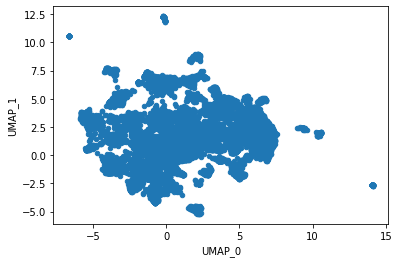

In [7]:
embedding_df.plot(x="UMAP_0", y="UMAP_1", kind="scatter")

### TSNE

In [8]:
tsne_reducer = TSNE(n_components=2, random_state=123, perplexity=50)
tsne_embedding_df = tsne_reducer.fit_transform(pca_df.drop(["PCA_0"], axis="columns"))

In [9]:
tsne_embedding_df = pd.DataFrame(tsne_embedding_df)
tsne_embedding_df.columns = ["TSNE_0", "TSNE_1"]
tsne_embedding_df = pd.concat(
    [
        df.loc[:, meta_features],
        tsne_embedding_df
    ],
    axis="columns"
)

tsne_embedding_df.head()

,replicate_id,sig_id,pert_id,pert_idose,det_plate,det_well,dose,Metadata_broad_sample,pert_iname,moa,TSNE_0,TSNE_1
0,REP.A001_A549_24H_X1_B27:A03,REP.A001_A549_24H:A03,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A03,0,DMSO,DMSO,Control vehicle,27.307106,-7.616936
1,REP.A001_A549_24H_X2_B27:A03,REP.A001_A549_24H:A03,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A03,0,DMSO,DMSO,Control vehicle,9.601002,49.317417
2,REP.A001_A549_24H_X3_B27:A03,REP.A001_A549_24H:A03,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A03,0,DMSO,DMSO,Control vehicle,-18.362843,11.885766
3,REP.A001_A549_24H_X1_B27:A04,REP.A001_A549_24H:A04,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A04,0,DMSO,DMSO,Control vehicle,45.455135,-6.803920
4,REP.A001_A549_24H_X2_B27:A04,REP.A001_A549_24H:A04,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A04,0,DMSO,DMSO,Control vehicle,50.285496,0.498753


<AxesSubplot:xlabel='TSNE_0', ylabel='TSNE_1'>

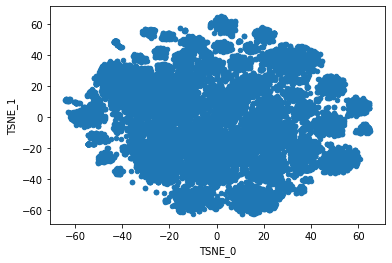

In [10]:
tsne_embedding_df.plot(x="TSNE_0", y="TSNE_1", kind="scatter")

### Merge data and output

In [11]:
embedding_df = embedding_df.merge(tsne_embedding_df, on=meta_features)

# Create column dictating if the perturbation is DMSO or a compound
embedding_df = embedding_df.assign(dmso_label="DMSO")
embedding_df.loc[embedding_df.Metadata_broad_sample != "DMSO", "dmso_label"] = "compound"

# Output file
embedding_df.to_csv(output_file, sep="\t", index=False)

print(embedding_df.shape)
embedding_df.head()

(27837, 15)


,replicate_id,sig_id,pert_id,pert_idose,det_plate,det_well,dose,Metadata_broad_sample,pert_iname,moa,UMAP_0,UMAP_1,TSNE_0,TSNE_1,dmso_label
0,REP.A001_A549_24H_X1_B27:A03,REP.A001_A549_24H:A03,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A03,0,DMSO,DMSO,Control vehicle,-3.851050,-1.445690,27.307106,-7.616936,DMSO
1,REP.A001_A549_24H_X2_B27:A03,REP.A001_A549_24H:A03,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A03,0,DMSO,DMSO,Control vehicle,0.936501,6.700003,9.601002,49.317417,DMSO
2,REP.A001_A549_24H_X3_B27:A03,REP.A001_A549_24H:A03,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A03,0,DMSO,DMSO,Control vehicle,5.401163,2.289466,-18.362843,11.885766,DMSO
3,REP.A001_A549_24H_X1_B27:A04,REP.A001_A549_24H:A04,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A04,0,DMSO,DMSO,Control vehicle,-3.289125,5.188151,45.455135,-6.803920,DMSO
4,REP.A001_A549_24H_X2_B27:A04,REP.A001_A549_24H:A04,DMSO,-666,REP.A001_A549_24H_X1_B27|REP.A001_A549_24H_X2_...,A04,0,DMSO,DMSO,Control vehicle,-2.977309,5.479567,50.285496,0.498753,DMSO
